<h1>Model_Selection_Training_Cluster_1</h1>

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle

C:\Users\Dinesh\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("Data/Cluster_data.csv")

In [4]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,Cluster,Label
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.500000,126.0,2.140000,110.000000,2,1.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.000000,103.0,1.966667,108.666667,0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.633333,110.0,1.910000,121.000000,2,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.900000,176.0,2.003333,177.666667,2,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.200000,62.0,1.870000,71.000000,0,1.0


In [5]:
list_of_clusters = df["Cluster"].unique()

In [6]:
list_of_clusters

array([2, 0, 1], dtype=int64)

In [7]:
cluster_data_2 = df[df["Cluster"] == list_of_clusters[2]]

In [8]:
cluster_data_2.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,Cluster,Label
40,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.4,40.0,2.16,34.0,1,2.0
88,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.4,12.0,2.24,9.9,1,2.0
89,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.3,33.0,1.53,61.0,1,1.0
91,81.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.2,40.0,1.95,42.0,1,1.0
116,51.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,33.0,2.16,29.0,1,2.0


In [9]:
cluster_feature_2 = cluster_data_2.drop(["Cluster", "Label"], axis = 1)
cluster_label_2 = cluster_data_2["Label"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(cluster_feature_2, cluster_label_2, test_size=.3, random_state=355)

<h1> Random Forest </h1>

In [11]:
clf = RandomForestClassifier()

In [12]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [13]:
clf.score(x_test, y_test)

0.9965936739659368

In [14]:
clf.score(x_train, y_train)

1.0

In [15]:
param_clf = {"n_estimators": [10, 50, 100, 130, 160, 200, 250], 
             "criterion": ['gini', 'entropy'],
            "max_depth": range(2, 8, 1), 
             "max_features": ['sqrt', 'log2']
}

In [16]:
grid = GridSearchCV(estimator=clf, param_grid=param_clf, cv=10, n_jobs=-1, error_score="raise")

In [16]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 8),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 130, 160, 200, 250]})

In [17]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 10}

In [17]:
clf = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt', n_estimators=10)

In [18]:
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=10)

In [19]:
clf.score(x_test, y_test)

0.9961070559610705

In [20]:
clf.score(x_train, y_train)

0.9979136240350511

In [22]:
prediction_clf = clf.predict_proba(x_test)

In [25]:
if len(y_test.unique()) == 1:
    clf_score = accuracy_score(y_test, prediction_clf)
else:
    clf_score = roc_auc_score(y_test, prediction_clf, multi_class="ovr")

In [26]:
clf_score

0.9932519073016862

<h1> KNN </h1>

In [27]:
knn = KNeighborsClassifier()

In [28]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
knn.score(x_test, y_test)

0.9951338199513382

In [30]:
param_knn = {
    'n_neighbors' : [i for i in range(5, 25)],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [10, 15, 20, 25, 30, 35, 40, 50],
    'p' : [1,2],
    'weights' : ['uniform', 'distance']
}

In [44]:
grid_knn = GridSearchCV(estimator=knn, param_grid=param_knn, cv = 10, error_score="raise", n_jobs=-1)

In [45]:
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 15, 20, 25, 30, 35, 40, 50],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [46]:
grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [31]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors = 5, p = 1, weights = 'distance')

In [32]:
knn.fit(x_test, y_test)

KNeighborsClassifier(leaf_size=10, p=1, weights='distance')

In [33]:
knn.score(x_train, y_train)

0.9912372209472147

In [34]:
knn.score(x_test, y_test)

1.0

In [35]:
prediction_score = knn.predict_proba(x_test)

In [36]:
if len(y_test.unique()) == 1:
    knn_score = accuracy_score(y_test, prediction_score)
else:
    knn_score = roc_auc_score(y_test, prediction_score, multi_class="ovr")

In [37]:
knn_score

1.0

<h1> SVM </h1>

In [39]:
svm = SVC()

In [40]:
svm.fit(x_train, y_train)

SVC()

In [41]:
svm.score(x_test, y_test)

0.9712895377128954

In [42]:
svm.score(x_train, y_train)

0.968078447736282

In [43]:
param_svc = {
    'kernel' :['linear', 'poly', 'rbf', 'sigmoid']
}

In [63]:
grid_svc = GridSearchCV(estimator=svm, param_grid=param_svc, cv = 10, n_jobs=-1, error_score="raise")

In [64]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [65]:
grid_svc.best_params_

{'kernel': 'linear'}

In [44]:
svm = SVC(kernel = 'linear')

In [45]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [46]:
svm.score(x_test, y_test)

0.9664233576642336

In [47]:
svm.score(x_train, y_train)

0.9609847694554559

In [58]:
prediction_svm = svm.score(x_test, y_test)

In [59]:
prediction_svm

0.9664233576642336

<h1> Decision Tree </h1>

In [60]:
dt = DecisionTreeClassifier()

In [61]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
dt.score(x_test, y_test)

0.9965936739659368

In [63]:
dt.score(x_train, y_train)

1.0

In [64]:
param_dt = {"criterion" : ['gini', 'entropy'],
             "splitter" : ['best', 'random'],
             "max_depth" : range(2, 40, 1),
             "min_samples_split" : range(2, 10, 1),
             "min_samples_leaf" : range(1, 10, 1)
}

In [65]:
grid_dt = GridSearchCV(estimator=dt, param_grid=param_dt, n_jobs=3, cv = 10, error_score="raise")

In [66]:
grid_dt.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [68]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 33,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'random'}

In [69]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=33, min_samples_leaf=1, min_samples_split=5, splitter='random')

In [71]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=33, min_samples_split=5, splitter='random')

In [72]:
dt.score(x_test, y_test)

0.9975669099756691

In [73]:
dt.score(x_train, y_train)

1.0

In [74]:
prediction_dt = dt.predict_proba(x_test)

In [76]:
dt_score = roc_auc_score(y_test, prediction_dt, multi_class='ovr')

In [77]:
dt_score

0.9426115627073657

<h1> Model Accuracy </h1>

In [79]:
import matplotlib.pyplot as plt

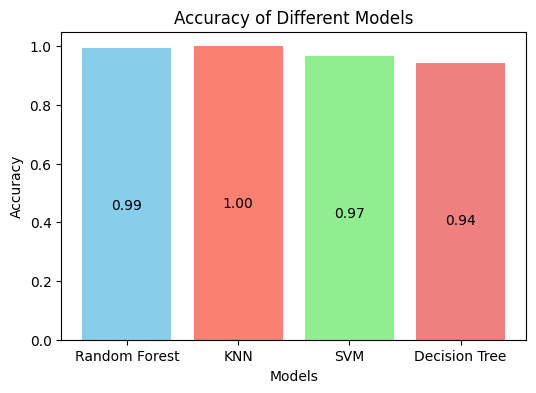

In [102]:

models = ['Random Forest', 'KNN', 'SVM', 'Decision Tree']

accuracies = [clf_score, knn_score, prediction_svm, dt_score]
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']


plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.55, f'{acc:.2f}', ha='center', color='black', fontsize=10)
plt.show()


<h4> Here the KNN is performing well on the cluster data 2 so we are using knn to predict the data </h4>

In [101]:
with open("Models/KNN2/knn.pkl", 'wb') as f:
    pickle.dump(knn, f)